In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, DBSCAN
import seaborn as sns; sns.set()
import numpy as np
from itertools import cycle
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ecopy as ep

In [13]:
df = pd.read_csv("C:/Python/temp_data.csv", sep=";")
x = df.iloc[1:, 1:].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf['names'] = df.track_name

dunes = df.iloc[1:, 1:].values**2
dunes_T = ep.transform(dunes, 'wisconsin')
dunes_D = ep.distance(dunes_T, 'bray')
dunesMDS = ep.MDS(dunes_D)
names = df['track_name'].values
massive = dunesMDS.scores

colors = cycle('bgrcmy')

c:\users\николай\appdata\local\programs\python\python37-32\lib\site-packages\ecopy\ordination\pcoa.py:138: RuntimeWarning: invalid value encountered in sqrt
  self.U = np.round(self.U.dot(np.diag(np.sqrt(self.evals))), 4)


Finished at iteration 2. Stress = 0.25585132299193775
Finished at iteration 31. Stress = 0.2274591054297454
Finished at iteration 8. Stress = 0.4107800658059858
Finished at iteration 10. Stress = 0.410116543703838
Finished at iteration 9. Stress = 0.41034983099099764
Finished at iteration 9. Stress = 0.41045043055766284
Finished at iteration 9. Stress = 0.40984302364552117
Finished at iteration 7. Stress = 0.41058926008769847
Finished at iteration 42. Stress = 0.28516502956652895
Finished at iteration 55. Stress = 0.2728617526207317
Finished at iteration 41. Stress = 0.30504047428596537
Finished at iteration 38. Stress = 0.26585857401112395
Finished at iteration 30. Stress = 0.27635481830847475
Finished at iteration 9. Stress = 0.4098304017345529
Finished at iteration 53. Stress = 0.2610933192156841
Finished at iteration 49. Stress = 0.2516383920851531
Finished at iteration 33. Stress = 0.2877567435830894
Finished at iteration 9. Stress = 0.4100175539983265
Finished at iteration 50. St

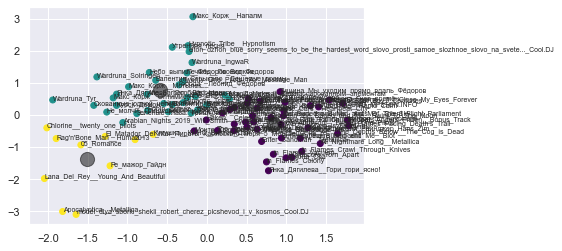

In [7]:
### K-MEANS

kmeans = KMeans(n_clusters = 3).fit(massive)
y_kmeans = kmeans.predict(massive)
plt.scatter(massive[:, 0], massive[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

for i in enumerate(names):
    plt.text(massive[i[0] - 1][0], massive[i[0] - 1][1], names[i[0]], size="xx-small")

Text(0.5, 1.0, 'Estimated number of clusters: 9')

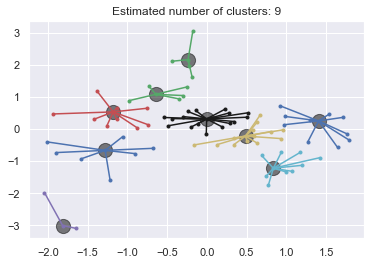

In [8]:
### AFINITY POROP

af = AffinityPropagation().fit(massive)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = massive[cluster_centers_indices[k]]
    plt.plot(massive[class_members, 0], massive[class_members, 1], col + '.')
    plt.scatter(cluster_center[0], cluster_center[1], c='black', s=200, alpha=0.5)
    for i in massive[class_members]:
        plt.plot([cluster_center[0], i[0]], [cluster_center[1], i[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)

Text(0.5, 1.0, 'Estimated number of clusters: 2')

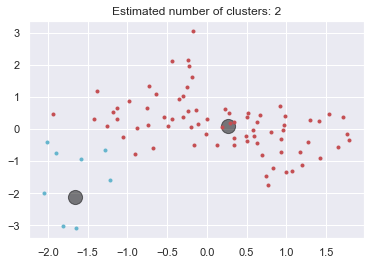

In [9]:
### MEANSHIFT

ms = MeanShift().fit(massive)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(massive[class_members, 0], massive[class_members, 1], col + '.')
    plt.scatter(cluster_center[0], cluster_center[1], c='black', s=200, alpha=0.5)

plt.title('Estimated number of clusters: %d' % n_clusters_)

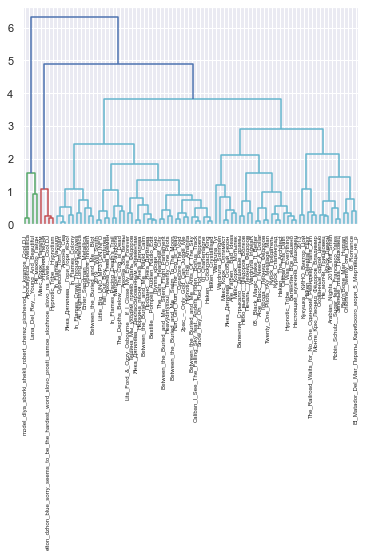

In [11]:
### IERARCHY

mergings = linkage(massive, method='complete')
dendrogram(mergings, labels=names)
plt.show()

Text(0.5, 1.0, 'Estimated number of clusters: 1')

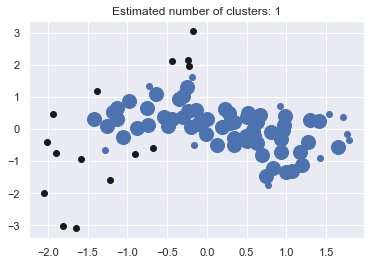

In [12]:
### DBSCAN

db = DBSCAN().fit(massive)
labels = db.labels_
samples = np.zeros_like(labels, dtype=bool)
samples[db.core_sample_indices_] = True

unique_labels = set(labels)
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_members = labels == k

    xy = massive[class_members & samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=col, markersize=14)

    xy = massive[class_members & ~samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=col, markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)